In [1]:
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#Load results of experiments
mu_values = np.load('GaussianCase_mu_values.npy')
expLin = np.load('GaussianCase_LinearKernel.npy')
expPoly = np.load('GaussianCase_PolyKernel.npy')

print('Gaussian case Linear kernel : ',len(expLin),' experiments run.')
print('Gaussian case Polynomial degree 2 kernel : ',len(expPoly),' experiments run.')

Gaussian case Linear kernel :  10  experiments run.
Gaussian case Polynomial degree 2 kernel :  10  experiments run.


In [3]:
#Calculate the true posterior
observed_data=np.array([[0]])

sigma=3
a_0= lambda mu: -(mu*mu)/(2*sigma*sigma)-np.log(np.sqrt(2*np.pi)*sigma)-np.log(norm.cdf((20-mu)/sigma)-norm.cdf((-20-mu)/sigma))
a_1= lambda mu: mu/(sigma*sigma)
a_2= lambda mu: -1/(2*sigma*sigma)


true_probabilities= np.zeros(10)
i=0
for mu in mu_values:
    true_probabilities[i] = np.exp(a_0(mu)+a_1(mu)*observed_data+a_2(mu)*np.power([observed_data],2))
    i=i+1 

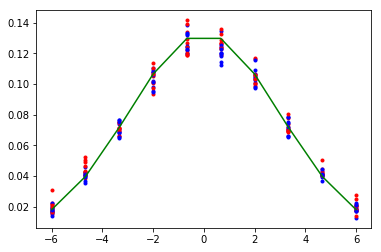

The green line is the true postetior
Red points are the probabilities calculated using a linear kernel with basis [1,x,x^2]
Blue points are the probabilities calculated using a polynomial kernel of degree 2


In [4]:
#Plot experiments results over true posterior.
plt.clf()
for i in range(len(expLin)):
    plt.plot(mu_values,expLin[i],'r.')
    plt.plot(mu_values,expPoly[i],'b.') 
plt.plot(mu_values,true_probabilities,'g-')
plt.show()
print('The green line is the true postetior')
print('Red points are the probabilities calculated using a linear kernel with basis [1,x,x^2]')
print('Blue points are the probabilities calculated using a polynomial kernel of degree 2')

In [5]:
var = np.zeros(expPoly.shape[1])
for i in range(expPoly.shape[0]):
    a = expPoly[i]-true_probabilities
    var += (a**2)
#var is the variance of probability calculated for each mu value from the true posterior
print('Polynomial kernel degree 2: ')
print('Averaged for all mu values: ')
print('Standard deviation from the true posterior:', np.average(np.sqrt(var)))

Polynomial kernel degree 2: 
Averaged for all mu values: 
Standard deviation from the true posterior: 0.0152388504398


In [6]:
var = np.zeros(expLin.shape[1])
for i in range(expLin.shape[0]):
    a = expLin[i]-true_probabilities
    var += (a**2)
#var is the variance of probability calculated for each mu value from the true posterior
print('linear kernel with basis [1,x,x^2]: ')
print('Averaged for all mu values: ')
print('Standard deviation from the true posterior:',np.average(np.sqrt(var)))

linear kernel with basis [1,x,x^2]: 
Averaged for all mu values: 
Standard deviation from the true posterior: 0.0167201594519


#### Quantiles for probabilities calculated. Linear kernel ####

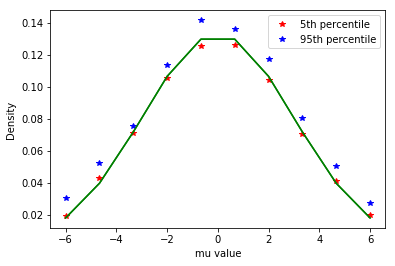

In [12]:
from scipy.stats import mstats
plt.clf()
fig =plt.figure()
ax =fig.add_subplot(111)

quantiles = mstats.mquantiles(expLin,prob=[0.5,0.95], axis=0)
labels = ['5%', '95%']
k=0
color = ['r*','b*']
labels =['5th percentile','95th percentile']
for i, q in enumerate(quantiles):
    ax.plot(mu_values,q,color[k],label =labels[k])
    ax.plot(mu_values,true_probabilities,'g-')
    k +=1
ax.set_ylabel('Density ')
ax.set_xlabel('mu value')
plt.legend()
plt.show()
fig.savefig('linear_post.pdf')

#### Quantiles for probabilities calculated.  Polynomial  degree 2 kernel

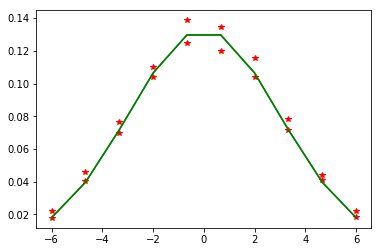

In [8]:
from scipy.stats import mstats
quantiles = mstats.mquantiles(expPoly,prob=[0.5,0.95], axis=0)
labels = ['5%', '95%']
plt.clf()
for i, q in enumerate(quantiles):
    plt.plot(mu_values,q,'r*')
    plt.plot(mu_values,true_probabilities,'g-')
plt.legend()
plt.show()